In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print('x_train Shape:',x_train.shape)
print('y_train Shape:',y_train.shape)
print('x_test Shape:',x_test.shape)
print('y_test Shape:',y_test.shape)

x_train Shape: (50000, 32, 32, 3)
y_train Shape: (50000, 1)
x_test Shape: (10000, 32, 32, 3)
y_test Shape: (10000, 1)


In [5]:
#x_train[0]

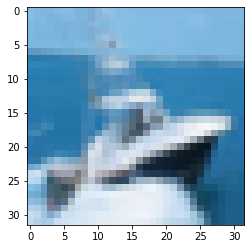

the label of the image is: [9]


In [41]:
import matplotlib.pyplot as plt
img=plt.imshow(x_train[8])
plt.show()
#lable of the immage
print('the label of the image is:',y_train[1])

In [7]:
#one_hot codeing
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
le=LabelEncoder()
encoded_y=le.fit_transform(y_train)
encoded_y_train=keras.utils.to_categorical(encoded_y)
encoded_y=le.fit_transform(y_test)
encoded_y_test=keras.utils.to_categorical(encoded_y)

F:\anaconda install\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
print('one hot coding of lable:',encoded_y_train[1])

one hot coding of lable: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
#normalizing thhe values of the pixel of the images is between 0 to 1
x_train=x_train/255
x_test=x_test/255

In [14]:
#bilt the CNN
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Flatten,Dense
model=models.Sequential()
#conversion layer
model.add(Conv2D(32,(5,5), activation='relu',input_shape=(32,32,3)))
#max Polling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#sampe
model.add(Conv2D(32,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
hist=model.fit(x_train,encoded_y_train, epochs=5,batch_size=256,validation_split=.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/5
35000/35000 [==============================] - 947s 27ms/sample - loss: 1.6939 - accuracy: 0.3886 - val_loss: 1.4232 - val_accuracy: 0.4981
Epoch 2/5
35000/35000 [==============================] - 604s 17ms/sample - loss: 1.3436 - accuracy: 0.5205 - val_loss: 1.3020 - val_accuracy: 0.5420
Epoch 3/5
35000/35000 [==============================] - 764s 22ms/sample - loss: 1.1835 - accuracy: 0.5819 - val_loss: 1.1944 - val_accuracy: 0.5812
Epoch 4/5
35000/35000 [==============================] - 677s 19ms/sample - loss: 1.0830 - accuracy: 0.6221 - val_loss: 1.1223 - val_accuracy: 0.6061
Epoch 5/5
35000/35000 [==============================] - 690s 20ms/sample - loss: 1.0213 - accuracy: 0.6427 - val_loss: 1.0827 - val_accuracy: 0.6255


In [17]:
model.evaluate(x_test,encoded_y_test,verbose=2)

10000/1 - 109s - loss: 1.0443 - accuracy: 0.6300


[1.0674902128219605, 0.63]

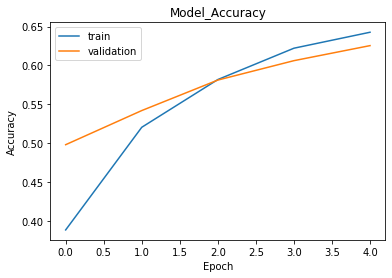

In [23]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc='upper left')
plt.show()

In [35]:
!setup.py install

'setup.py' is not recognized as an internal or external command,
operable program or batch file.


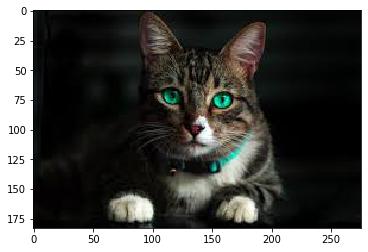

In [40]:
from PIL import Image 
  
filename = "cat.jpg"
with Image.open(filename) as image: 
    width, height = image.size 
my_image=plt.imread('cat.jpg')
img=plt.imshow(my_image)

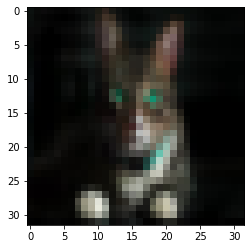

In [43]:
from skimage.transform import resize
image_resize=resize(my_image,(32,32,3))
img=plt.imshow(image_resize)

In [45]:
import numpy as np
prob=model.predict(np.array( [image_resize,] ))
prob

array([[3.2696878e-03, 1.0118226e-04, 7.7887052e-01, 1.7262593e-01,
        1.1660472e-02, 2.3670005e-02, 3.3258752e-03, 1.6218338e-03,
        4.4832379e-03, 3.7129351e-04]], dtype=float32)

In [42]:
my_class=['airplane','automobile','bird','cat','deer','dog','frog','hourse','ship','truck']
index=np.argsort(prob[0,:])
print('mostly like class:',my_class[index[9]],'.... probiblity:',prob[0,index[9]])

NameError: name 'np' is not defined

In [57]:
model.save('my_model.h5')

In [61]:
from tensorflow.keras.models import load_model
model=load_model('my_model.h5')